<a href="https://colab.research.google.com/github/sakaleshhubli/AI/blob/main/KNN_using_iris_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.groupby('Species').size()

,0
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = df[feature_columns].values
y = df['Species'].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

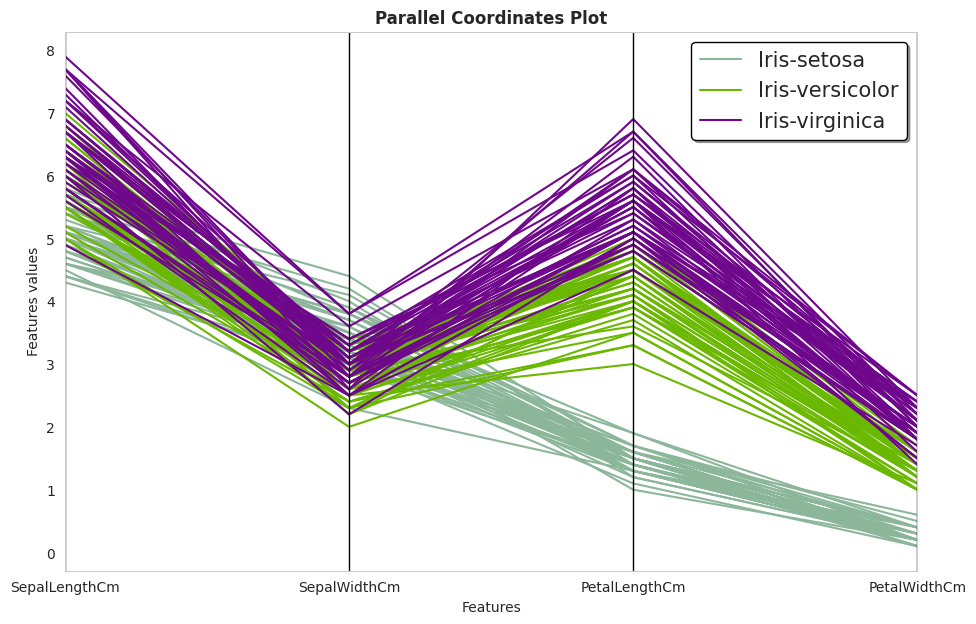

In [ ]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(11,7))
parallel_coordinates(df.drop("Id", axis=1), "Species")
plt.title('Parallel Coordinates Plot', fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Features values')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

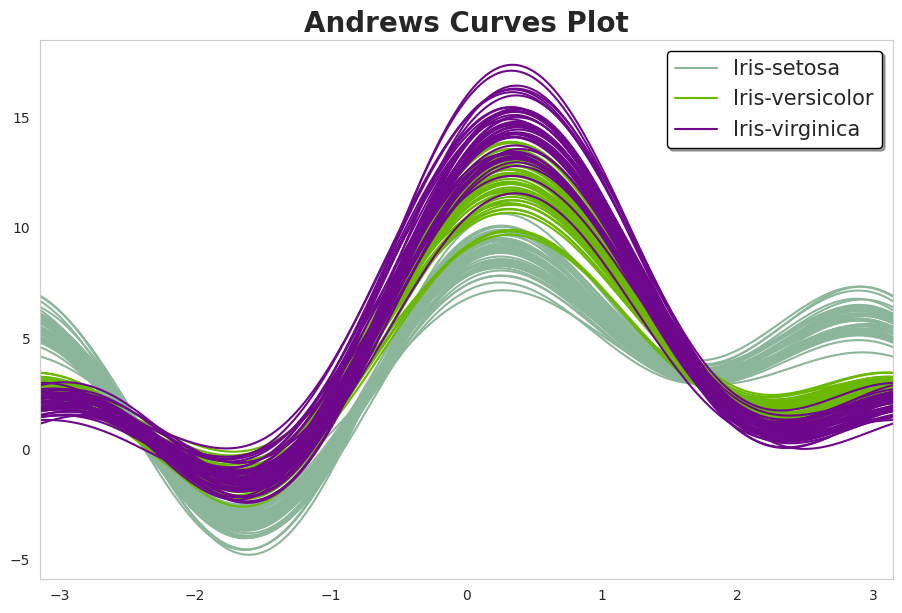

In [ ]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(11,7))
andrews_curves(df.drop("Id", axis=1), "Species")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

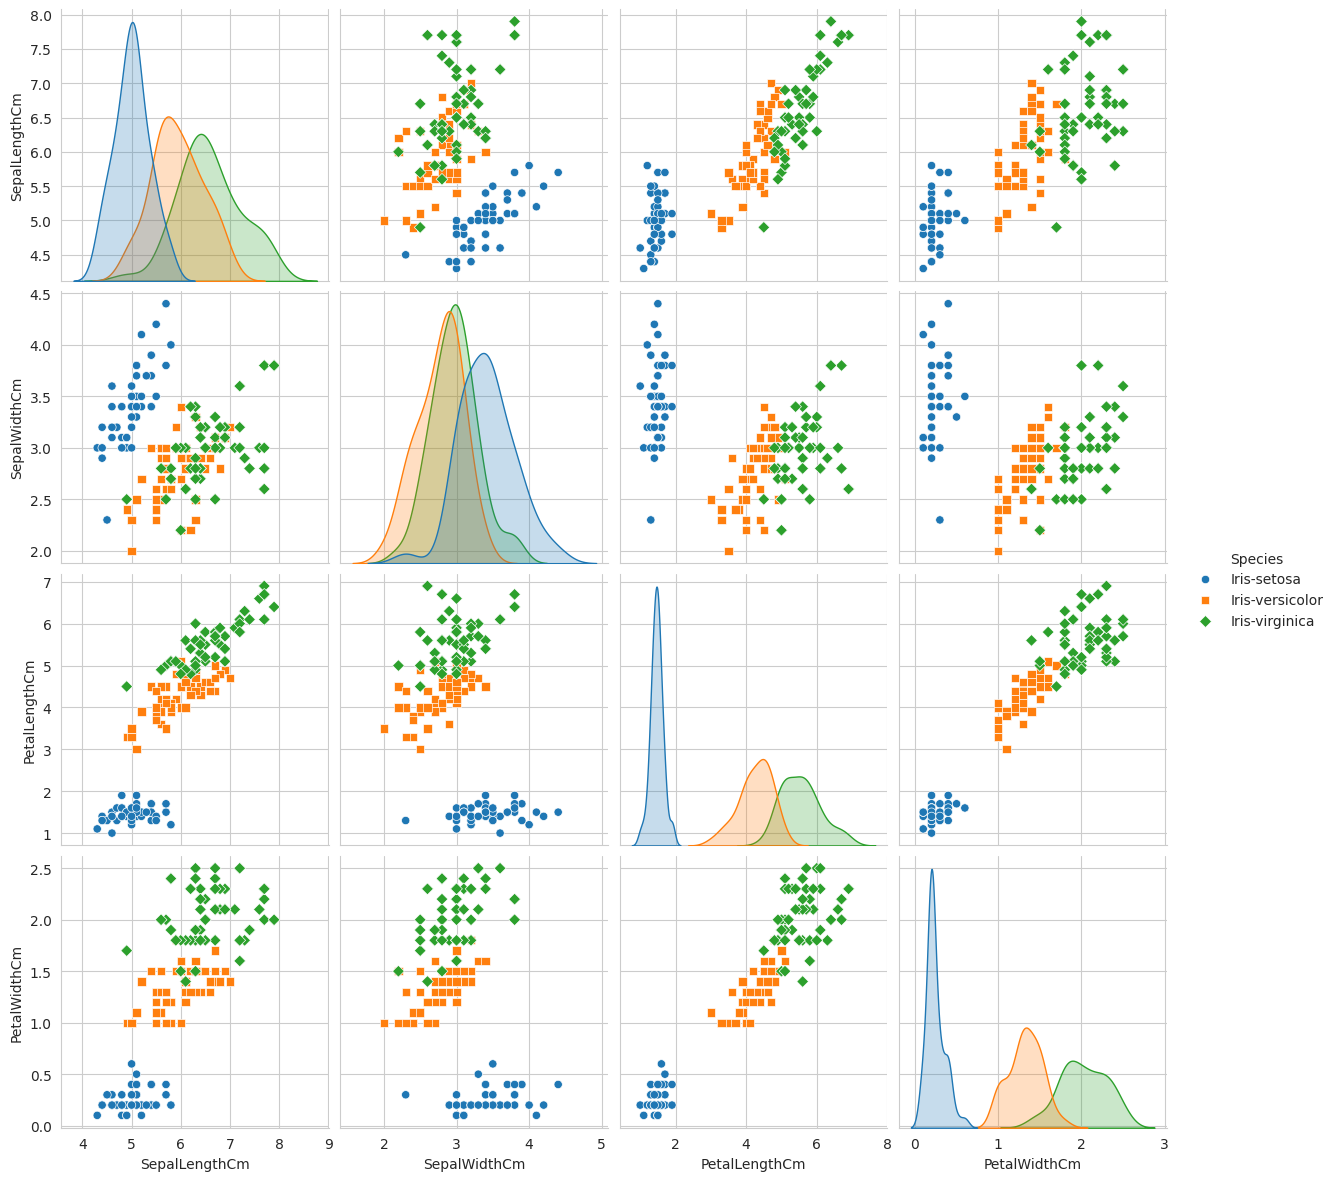

In [ ]:
plt.figure()
sns.pairplot(df.drop("Id", axis=1), hue = "Species", size=3, markers=["o", "s", "D"])
plt.show()

<Figure size 640x480 with 0 Axes>

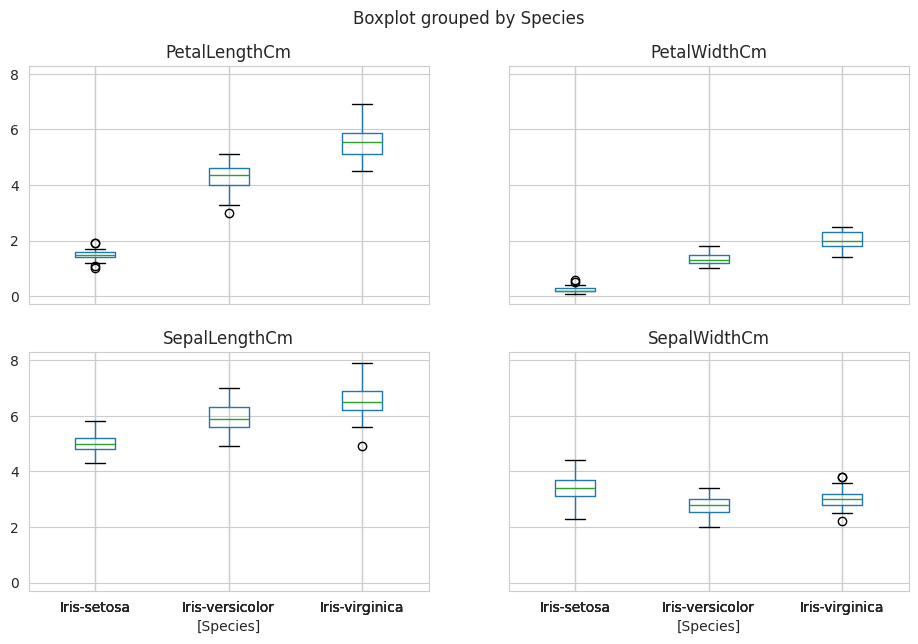

In [ ]:
plt.figure()
df.drop("Id", axis=1).boxplot(by="Species", figsize=(11, 7))
plt.show()


In [ ]:
setosa = df[df['Species'] == 'Iris-setosa']
versicolor = df[df['Species'] == 'Iris-versicolor']
virginica = df[df['Species'] == 'Iris-virginica']

In [ ]:
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')


Accuracy of our model is equal 96.67 %.


In [ ]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

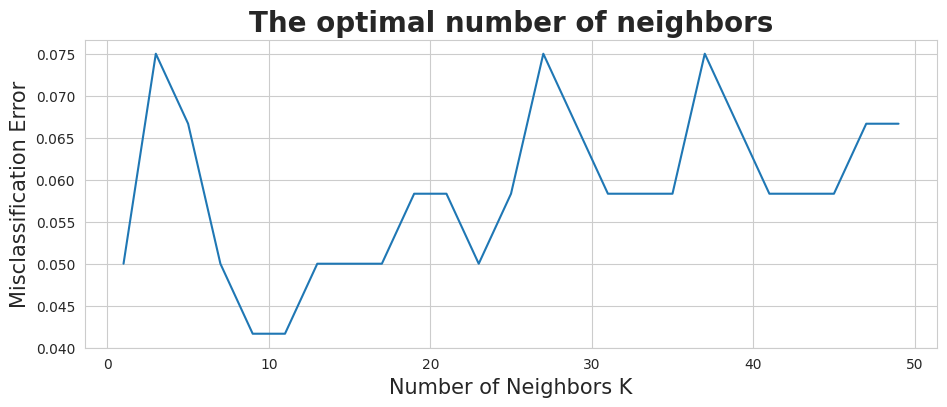

In [ ]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(11, 4))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [ ]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.


In [ ]:
setosa

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


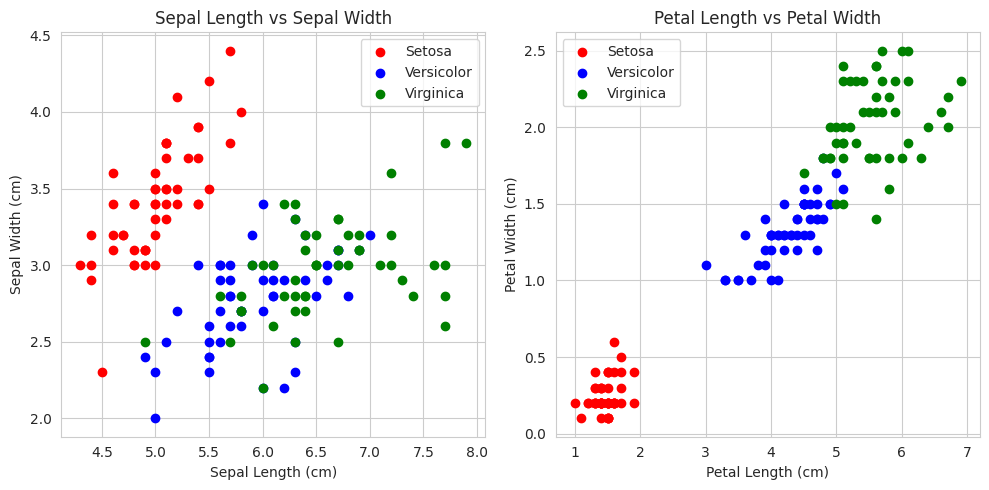

In [ ]:
# prompt: generate 2 graphs first one sepal length vs sepal width other with petal length vs petal width for all 3 species in

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(setosa['SepalLengthCm'], setosa['SepalWidthCm'], label='Setosa', color='red')
plt.scatter(versicolor['SepalLengthCm'], versicolor['SepalWidthCm'], label='Versicolor', color='blue')
plt.scatter(virginica['SepalLengthCm'], virginica['SepalWidthCm'], label='Virginica', color='green')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(setosa['PetalLengthCm'], setosa['PetalWidthCm'], label='Setosa', color='red')
plt.scatter(versicolor['PetalLengthCm'], versicolor['PetalWidthCm'], label='Versicolor', color='blue')
plt.scatter(virginica['PetalLengthCm'], virginica['PetalWidthCm'], label='Virginica', color='green')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']


In [ ]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=50)

In [ ]:
predictions = knn.predict(X)
df['Predicted_Species'] = predictions

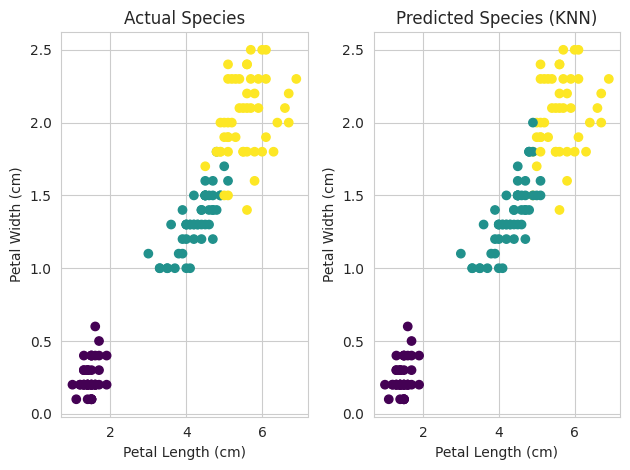

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'],
            c=df['Species'].astype('category').cat.codes, cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Actual Species')

# Predicted species plot
plt.subplot(1, 2, 2)
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'],
            c=df['Predicted_Species'].astype('category').cat.codes, cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Predicted Species (KNN)')

plt.tight_layout()
plt.show()

In [ ]:
accuracy = (df['Species'] == df['Predicted_Species']).mean()
print(f"Accuracy (on same data): {accuracy:.2f}")

Accuracy (on same data): 0.94
